In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

In [177]:
def dateparse(date) -> str:
    date = date.split("-")
    return "%s-%s" % (date[0], date[1])

In [178]:
kernels_data = pd.read_csv(
    "data/kaggle/all_data.csv",
    parse_dates=["date"],
    date_parser=dateparse
)

In [179]:
kernels_data.head(5)

,medal,language,comments,votes,date
0,bronze,R,4,12,2017-09-01
1,NaN,Python,3,2,2017-09-01
2,NaN,Python,0,0,2017-09-01
3,NaN,Python,0,0,2017-09-01
4,NaN,Python,0,1,2017-09-01


In [180]:
languages = kernels_data[["date", "language"]]

In [181]:
languages.head()

,date,language
0,2017-09-01,R
1,2017-09-01,Python
2,2017-09-01,Python
3,2017-09-01,Python
4,2017-09-01,Python


In [182]:
languages_graph = languages.groupby(["date","language"]).size().to_frame("Total")
languages_graph.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Total</th>
    </tr>
    <tr>
      <th>date</th>
      <th>language</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-03-01</th>
      <th>R</th>
      <td>17</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2015-04-01</th>
      <th>Python</th>
      <td>156</td>
    </tr>
    <tr>
      <th>R</th>
      <td>189</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2015-05-01</th>
      <th>Julia</th>
      <td>13</td>
    </tr>
    <tr>
      <th>Python</th>
      <td>212</td>
    </tr>
  </tbody>
</table>
</div>

In [183]:
languages_graph_unstacked = languages_graph.unstack()
languages_graph_unstacked.head()


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">Total</th>
    </tr>
    <tr>
      <th>language</th>
      <th>Julia</th>
      <th>Python</th>
      <th>R</th>
      <th>SQLite</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-03-01</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>17.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-04-01</th>
      <td>NaN</td>
      <td>156.0</td>
      <td>189.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-05-01</th>
      <td>13.0</td>
      <td>212.0</td>
      <td>202.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-06-01</th>
      <td>9.0</td>
      <td>309.0</td>
      <td>203.0</td>
      <td>26.0</td>
    </tr>
    <tr>
      <th>2015-07-01</th>
      <td>25.0</td>
      <td>593.0</td>
      <td>364.0</td>
      <td>15.0</td>
    </tr>
  </tbody>
</table>
</div>

In [184]:
languages_graph_unstacked.index = languages_graph_unstacked.index.map(lambda x: x.strftime('%b %Y'))
languages_graph_unstacked.index


Index(['Mar 2015', 'Apr 2015', 'May 2015', 'Jun 2015', 'Jul 2015', 'Aug 2015',
       'Sep 2015', 'Oct 2015', 'Nov 2015', 'Dec 2015', 'Jan 2016', 'Feb 2016',
       'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016', 'Jul 2016', 'Aug 2016',
       'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016', 'Jan 2017', 'Feb 2017',
       'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017',
       'Sep 2017'],
      dtype='object', name='date')

In [185]:
languages_graph_unstacked.fillna(0, inplace=True)
languages_graph_unstacked.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">Total</th>
    </tr>
    <tr>
      <th>language</th>
      <th>Julia</th>
      <th>Python</th>
      <th>R</th>
      <th>SQLite</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Mar 2015</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>17.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>Apr 2015</th>
      <td>0.0</td>
      <td>156.0</td>
      <td>189.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>May 2015</th>
      <td>13.0</td>
      <td>212.0</td>
      <td>202.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>Jun 2015</th>
      <td>9.0</td>
      <td>309.0</td>
      <td>203.0</td>
      <td>26.0</td>
    </tr>
    <tr>
      <th>Jul 2015</th>
      <td>25.0</td>
      <td>593.0</td>
      <td>364.0</td>
      <td>15.0</td>
    </tr>
  </tbody>
</table>
</div>

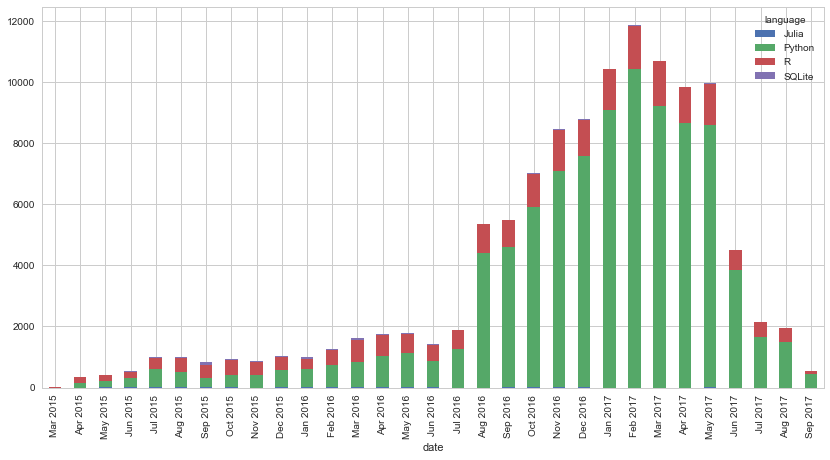

In [186]:
languages_graph_unstacked["Total"].plot.bar(stacked=True, figsize=(14,7))

In [187]:
medals = kernels_data[["date", "language", "medal"]]
medals.head()

,date,language,medal
0,2017-09-01,R,bronze
1,2017-09-01,Python,NaN
2,2017-09-01,Python,NaN
3,2017-09-01,Python,NaN
4,2017-09-01,Python,NaN


In [194]:
only_gold_medals = medals.loc[medals["medal"] == "gold"]
only_gold_medals.head()


,date,language,medal
55,2017-09-01,Python,gold
78,2017-09-01,Python,gold
104,2017-09-01,Python,gold
133,2017-09-01,Python,gold
147,2017-09-01,Python,gold


In [189]:
only_gold_medals_graph = only_gold_medals.groupby(["date", "language"]).size().to_frame("Total")
only_gold_medals_graph.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Total</th>
    </tr>
    <tr>
      <th>date</th>
      <th>language</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">2015-05-01</th>
      <th>Python</th>
      <td>2</td>
    </tr>
    <tr>
      <th>R</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2015-06-01</th>
      <th>Python</th>
      <td>1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2015-07-01</th>
      <th>Python</th>
      <td>1</td>
    </tr>
    <tr>
      <th>R</th>
      <td>1</td>
    </tr>
  </tbody>
</table>
</div>

In [190]:
only_gold_medals_graph = only_gold_medals_graph.unstack()
only_gold_medals_graph.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">Total</th>
    </tr>
    <tr>
      <th>language</th>
      <th>Python</th>
      <th>R</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-05-01</th>
      <td>2.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2015-06-01</th>
      <td>1.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-07-01</th>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2015-08-01</th>
      <td>NaN</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2015-10-01</th>
      <td>NaN</td>
      <td>2.0</td>
    </tr>
  </tbody>
</table>
</div>

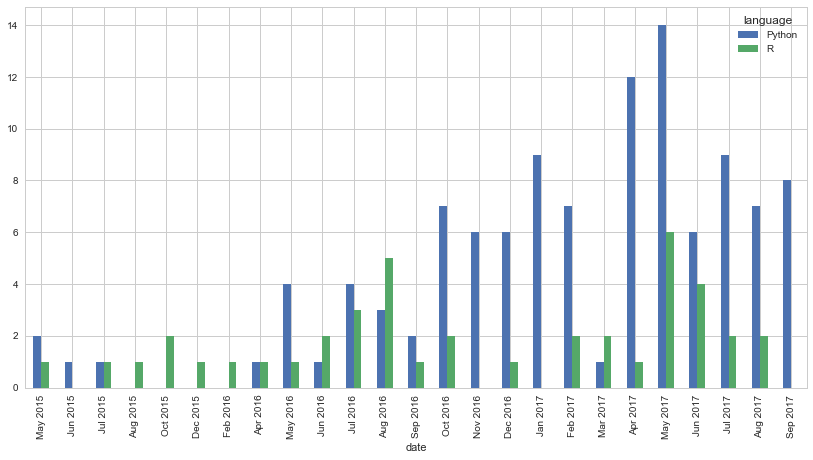

In [175]:
only_gold_medals_graph.index = only_gold_medals_graph.index.map(lambda x: x.strftime('%b %Y'))
only_gold_medals_graph["Total"].plot.bar(figsize=(14,7))

In [ ]:
# procentaj din limbaj cat au castig medalii
# contributia pe tari r vs python
# tooluri si projects which mention the tool

